In [1]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

import pylab as plt

# Set a standard figure size to use
plt.rcParams['figure.figsize'] = (15.0, 15.0)

# LSST Science Pipelines (Stack) packages
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay
%run -i  /sps/lsst/users/antilog/GitHub/eochar/python/lsst/eochar/bot_frame_op.py
from astropy.visualization import (ImageNormalize,PercentileInterval,HistEqStretch)
afwDisplay.setDefaultBackend('matplotlib')

In [2]:
repo = '/sps/lsst/groups/FocalPlane/SLAC/run6/butler/test_comcam/main_231023/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [3]:
for c in sorted(registry.queryCollections()):
    print(c)

LSSTComCam/calib/DM-33657
LSSTComCam/raw/all
u/plazas/DM-33657/biasGen.20220222.2/20220222T164636Z
u/plazas/DM-33657/calib/bias.20220302.b
u/plazas/DM-33657/calib/dark.20220302.b
u/plazas/DM-33657/calib/defects.20220302.b
u/plazas/DM-33657/calib/flatg07.20220302.b
u/plazas/DM-33657/calib/flati06.20220302.b
u/plazas/DM-33657/calib/flatr03.20220302.b
u/plazas/DM-33657/calib/flatu05.20220302.b
u/plazas/DM-33657/calib/flaty04.20220302.b
u/plazas/DM-33657/calib/flatz03.20220302.b
u/plazas/DM-33657/calib/ptc.20220302.b
u/plazas/DM-33657/darkGen.20220222.2/20220222T165451Z
u/plazas/DM-33657/defects.Gen.20220222.9/20220223T030155Z
u/plazas/DM-33657/flatGen.20220222.9/20220223T024618Z
u/plazas/DM-33657/flatGen.g07.20220226.1/20220226T165728Z
u/plazas/DM-33657/flatGen.r03.20220224.1/20220224T205344Z
u/plazas/DM-33657/flatGen.u05.20220226.1/20220226T171127Z
u/plazas/DM-33657/flatGen.y04.20220224.1/20220224T210416Z
u/plazas/DM-33657/flatGen.z03.20220226.1/20220226T170445Z
u/plazas/DM-33657/ptc.Gen

In [43]:
for x in sorted(registry.queryDatasetTypes()):
    print(x)

DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('ptc', {instrument, detector}, PhotonTransferCurveDataset, isCalibration=True)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)


In [44]:
collection = "LSSTComCam/raw/all"
butler = dafButler.Butler(repo, collections=collection)
registry = butler.registry

In [45]:
datasetRefs = list(registry.queryDatasets(datasetType='raw'))

In [46]:
len(datasetRefs)

9

In [47]:
datasetRefs = registry.queryDatasets(datasetType='raw', collections=collection)

for i, ref in enumerate(datasetRefs):
    print(ref.dataId.full)
    #if i > 2:
     #   break

{band: 'r', instrument: 'LSSTComCam', detector: 1, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 4, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 5, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 8, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 7, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 0, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 6, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 2, physical_filter: 'r_03', exposure: 2022060800057}
{band: 'r', instrument: 'LSSTComCam', detector: 3, physical_filter: 'r_03', exposure: 2022060800057}


In [48]:
for dim in ['exposure', 'detector']:
    print(list(registry.queryDimensionRecords(dim, where='exposure = 2022060800057 and detector=1'))[0])
    print()

exposure:
  instrument: 'LSSTComCam'
  id: 2022060800057
  physical_filter: 'r_03'
  obs_id: 'CC_O_20220608_000057'
  exposure_time: 0.0
  dark_time: 0.0966153
  observation_type: 'bias'
  observation_reason: 'bias'
  day_obs: 20220608
  seq_num: 57
  seq_start: 57
  seq_end: 57
  group_name: 'CALSET_20220609_0246'
  group_id: 5067825239949028920
  target_name: 'UNKNOWN'
  science_program: 'unknown'
  tracking_ra: 253.0485704212256
  tracking_dec: -30.224622781377533
  sky_angle: None
  azimuth: None
  zenith_angle: None
  has_simulated: True
  timespan: Timespan(begin=astropy.time.Time('2022-06-09 04:26:35.475018', scale='tai', format='iso'), end=astropy.time.Time('2022-06-09 04:26:35.482000', scale='tai', format='iso'))

detector:
  instrument: 'LSSTComCam'
  id: 1
  full_name: 'R22_S01'
  name_in_raft: 'S01'
  raft: 'R22'
  purpose: 'SCIENCE'



In [49]:
coaddId = {'exposure': 2022060800057, 'detector': 1}
image = butler.get('raw', dataId=coaddId)

(-0.5, 4607.5, -0.5, 4095.5)

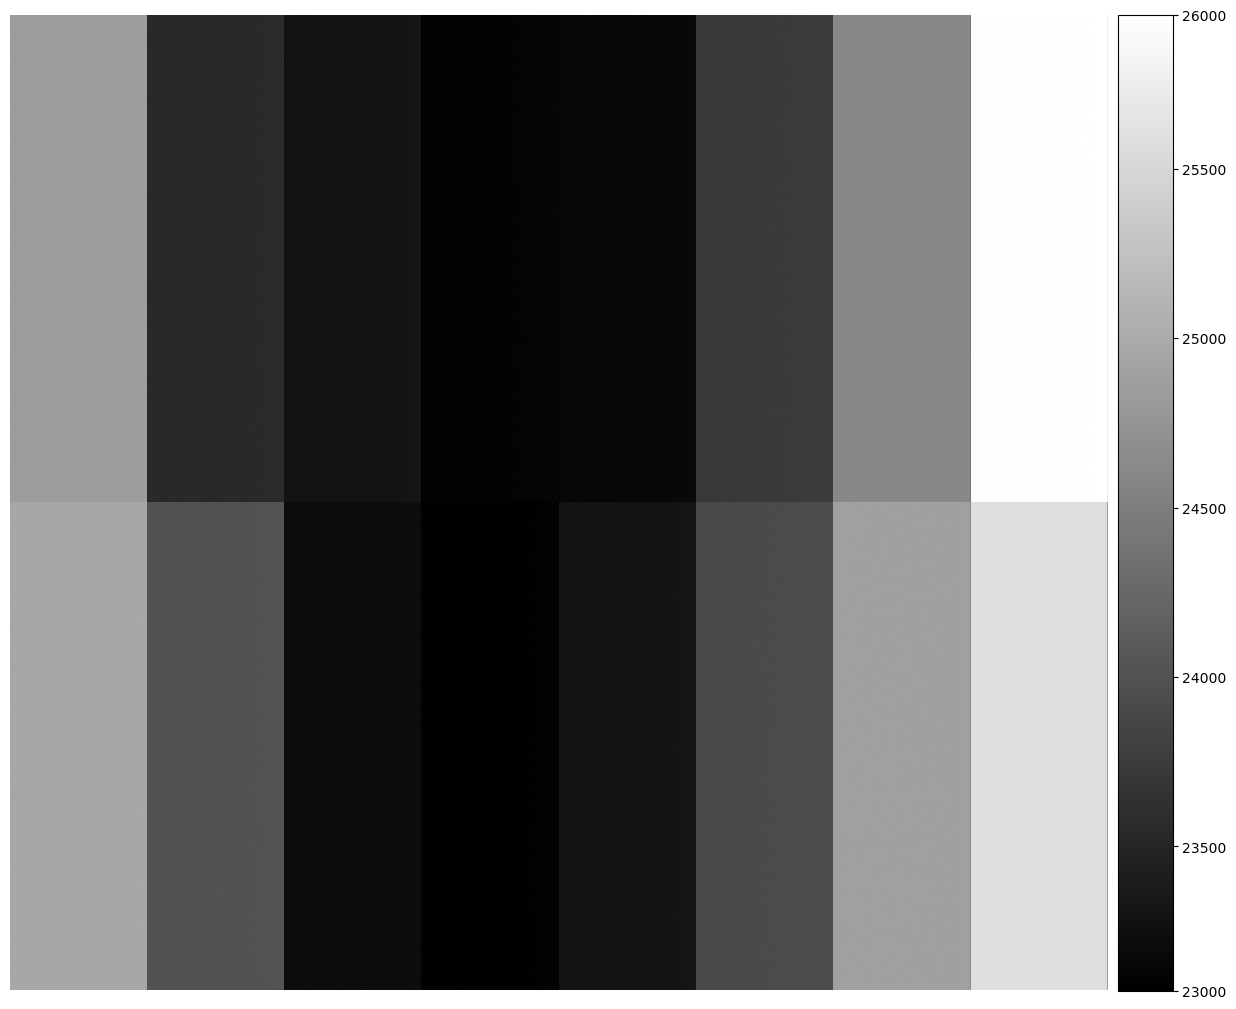

In [50]:
fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('linear', 'zscale')
afw_display.mtv(image.image)
plt.gca().axis('off')

Full CCD image (includes overscan pixels): (columns,rows) = (4096, 4608)


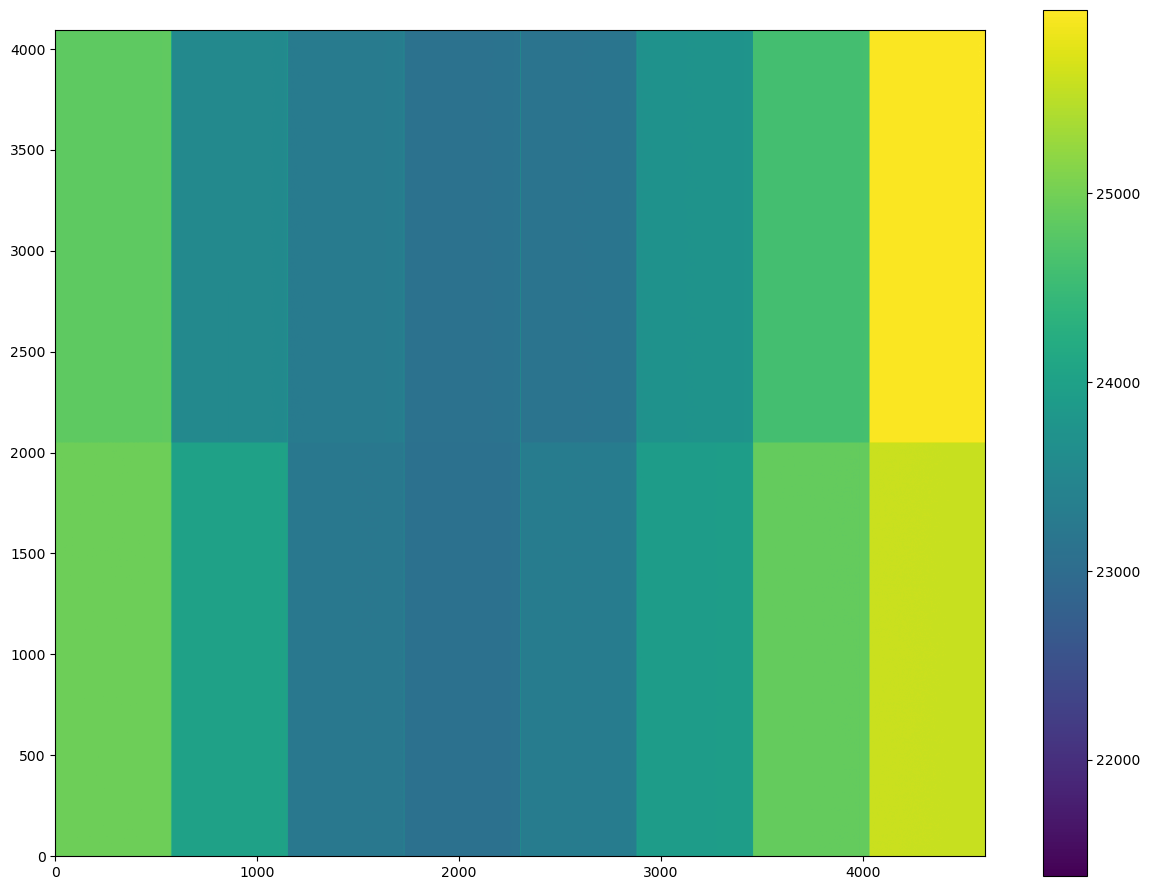

In [68]:
## What do these images look like?
# raw image
plt.figure()
# get full array
arr = image.getImage().getArray()
#norm = ImageNormalize(arr, interval=PercentileInterval(70.))
plt.imshow(arr, origin='lower')#, norm = norm)#, vmin=23000, vmax=26172)
plt.colorbar(shrink=0.75)
#plt.savefig(output_data+'raw.png') 
print('Full CCD image (includes overscan pixels): (columns,rows) = ' + str(arr.shape))

Science image of one amplifier: (columns,rows) = (2000, 509)


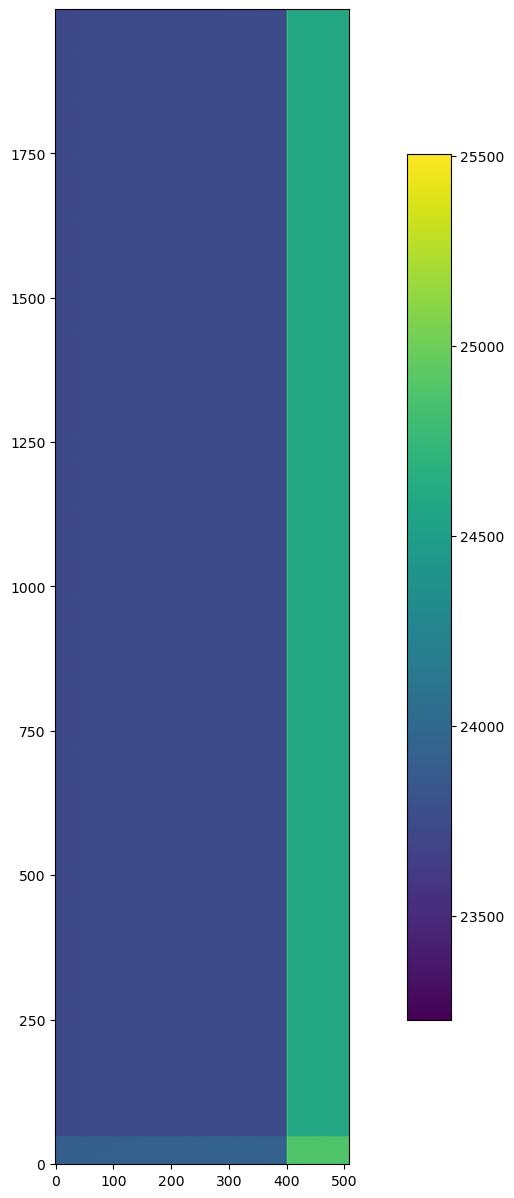

In [63]:
# per amp
detector = image.getDetector()
amplifier = detector['C16']
sub_im0 = image.getMaskedImage()[amplifier.getBBox()]
arr_amp = sub_im0.getImage().getArray()
#np.set_printoptions(threshold=sys.maxsize)
#print(arr_amp)
plt.imshow(arr_amp, origin='lower')#, vmin=26168, vmax=26170)
plt.colorbar(shrink = .75) 
#plt.savefig(output_data+'raw_amp.png')
print('Science image of one amplifier: (columns,rows) = ' + str(arr_amp.shape))

In [67]:
print(detector.getMaskedImage())

AttributeError: 'lsst.afw.cameraGeom._cameraGeom.Detector' object has no attribute 'getMaskedImage'

In [34]:
print(arr)

[[24930. 24918. 24924. ... 24874. 21410. 25511.]
 [24952. 24944. 24942. ... 24876. 21415. 25509.]
 [24947. 24939. 24953. ... 24870. 21400. 25511.]
 ...
 [24834. 24832. 24839. ... 25768. 24826. 25534.]
 [24835. 24835. 24831. ... 25764. 24836. 25535.]
 [24823. 24830. 24823. ... 25772. 24838. 25534.]]


In [35]:
arr_amp

array([[23916., 23907., 23917., ..., 24879., 24879., 24884.],
       [23916., 23909., 23919., ..., 24884., 24882., 24881.],
       [23922., 23915., 23919., ..., 24868., 24872., 24875.],
       ...,
       [23716., 23723., 23726., ..., 24602., 24605., 24597.],
       [23713., 23714., 23725., ..., 24600., 24605., 24602.],
       [23722., 23719., 23719., ..., 24605., 24599., 24604.]],
      dtype=float32)